In [57]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import numpy.polynomial.polynomial as poly

In [58]:
data = pd.read_csv("problem1.csv")
data.head()

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


In [59]:
xtrain = data['X_training']
ytrain = data['Y_training']

In [60]:
Max_Degree = 10
AIC = np.zeros(Max_Degree)
RSS = np.zeros(Max_Degree)

In [61]:
for i in range(Max_Degree):
    coef = poly.polyfit(xtrain, ytrain, i+1)
    model = poly.Polynomial(coef)
    RSS[i]=0.5*np.sum((ytrain-model(xtrain))**2)
    AIC[i]=len(xtrain)*math.log10(RSS[i]/len(xtrain))+ 2*len(coef)*len(xtrain)/(len(xtrain)-len(coef)-1)

No handles with labels found to put in legend.


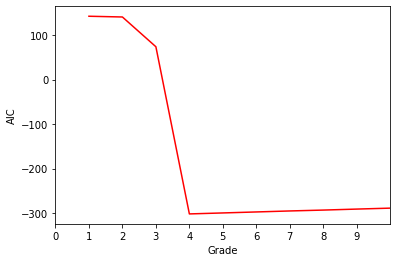

In [62]:
plt.plot(np.arange(1, Max_Degree+1), AIC, 'r')
plt.xlim(0, Max_Degree)
plt.xticks(np.arange(0, Max_Degree))
plt.legend(loc='best', frameon=False)
plt.xlabel("Grade")
plt.ylabel("AIC")
plt.show()

In [63]:
coef = poly.polyfit(xtrain, ytrain, 4)
coef

array([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109])

In [64]:
model = poly.Polynomial(coef)
model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

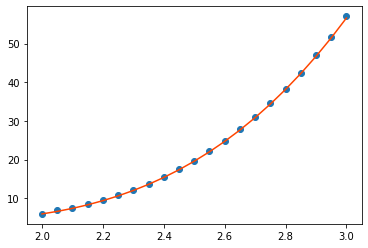

In [65]:
xtest = np.array(data["X_test"][0:21])
ytest = np.array(data["Y_test"][0:21])
plt.plot(xtest, model(xtest), c="orangered")
plt.scatter(xtest, ytest)
plt.show()

In [66]:
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.pipeline as pl 
from sklearn.model_selection import cross_val_score

In [67]:
k = 9
best_score = 0
best_degree = 1
for i in range(1, k+1):
    modeltemp = pl.make_pipeline(sp.PolynomialFeatures(i), lm.LinearRegression())
    scores = cross_val_score(modeltemp,xtest.reshape(-1, 1), ytest, cv=10)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_degree = i
print("the best degree: ", best_degree)
print("the best score: ", best_score)

the best degree:  4
the best score:  0.9947461682409914
